In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_ss = pd.read_csv('./sample_submission.csv')

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
x = df_train['HomePlanet'].values
y = df_train['Age'].values

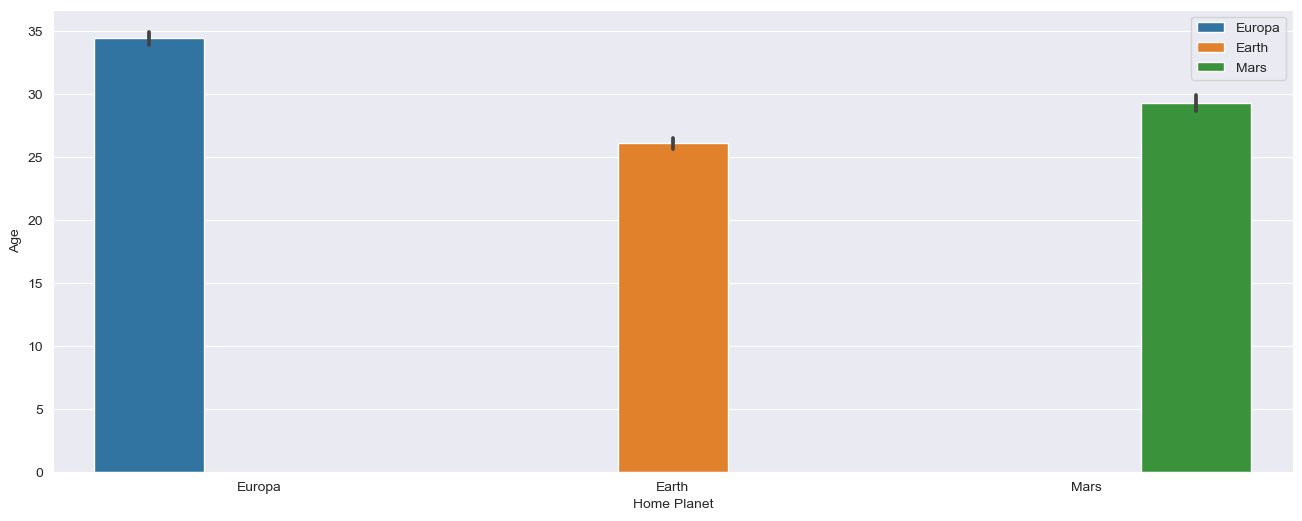

In [6]:
plt.figure(figsize=(16, 6))
sns.barplot(x = x, y = y, hue = x)
plt.xlabel('Home Planet')
plt.ylabel('Age')
plt.show()

# Ist Europa ein Planet?

In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train.info() # Die fehlenden Werte "null" müssen durch den Median ersetzt werden

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


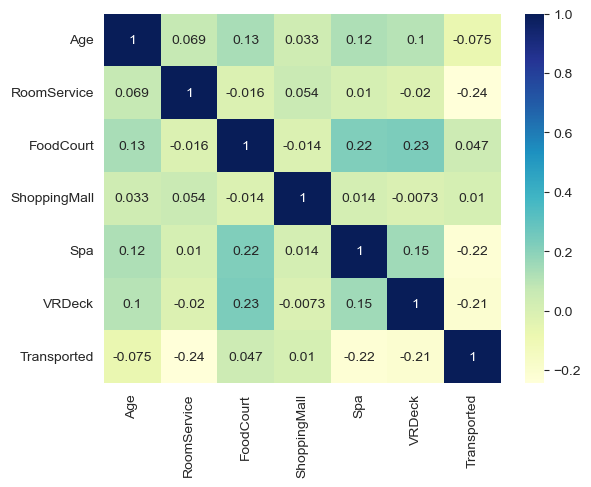

In [9]:
corr_matrix = df_train.corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

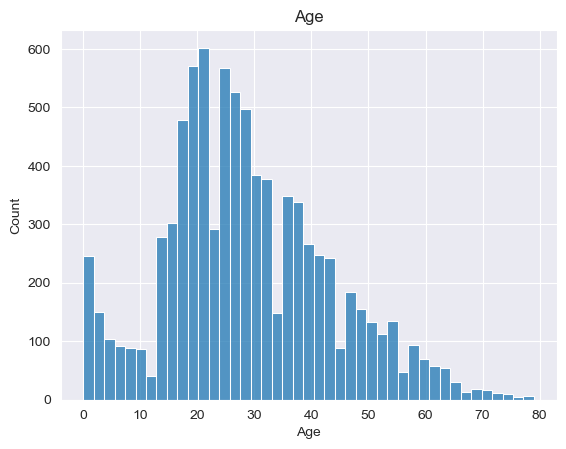

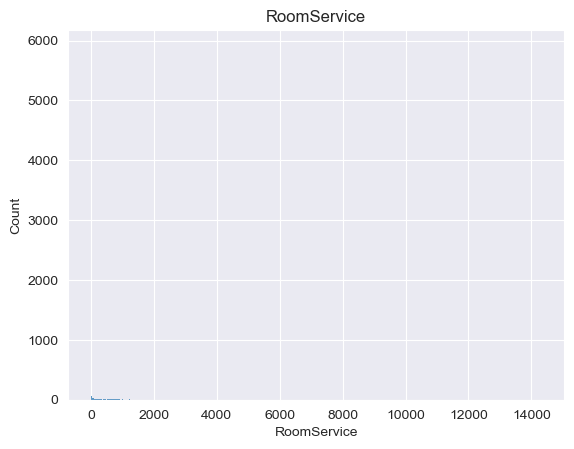

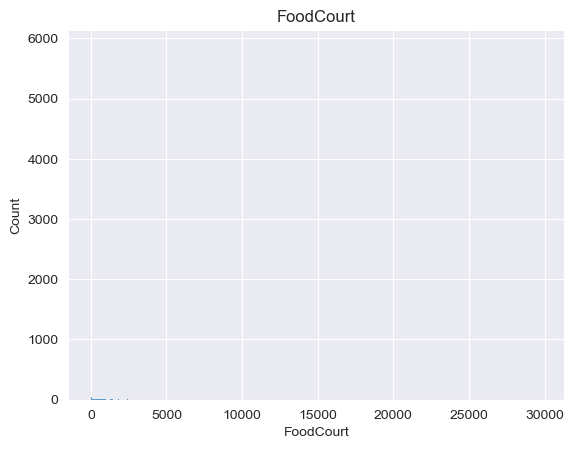

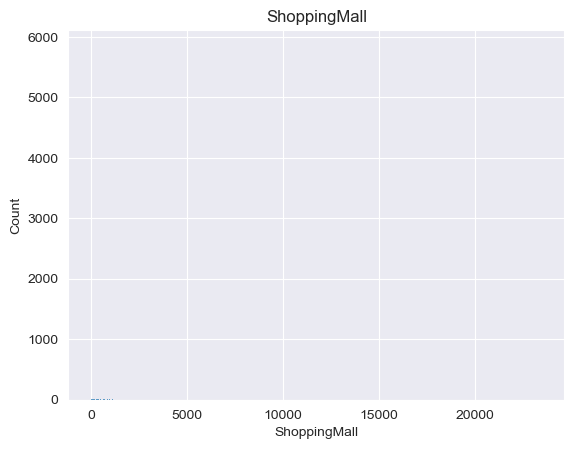

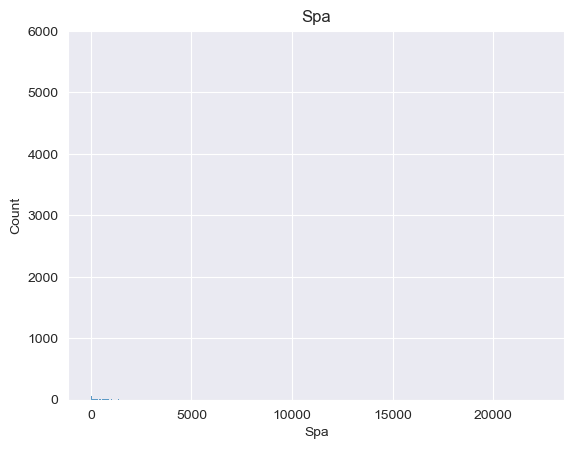

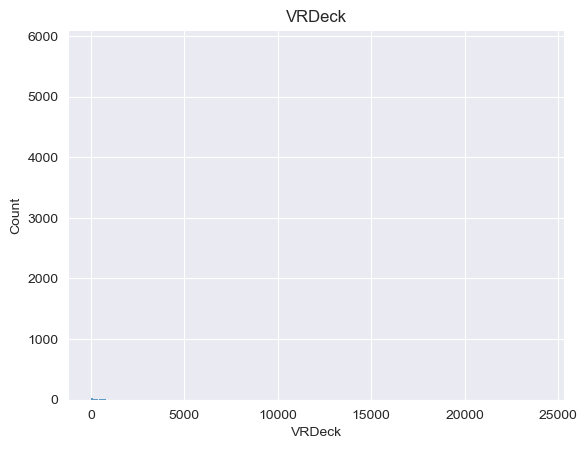

In [14]:
# numerische Daten und kategorische Daten separat betrachten

df_num = df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_cat = df_train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported']]

for i in df_num.columns:
    sns.histplot(data = df_num[i])
    plt.title(i)
    plt.show()

In [16]:
# Vergleich der Transportrate zwischen Alter, FoodCourt, Spa, VRDeck und RoomService
pd.pivot_table(df_train, index = 'Transported', values = ['Age', 'VIP', 'FoodCourt', 'Spa', 'VRDeck', 'RoomService'])

,Age,FoodCourt,RoomService,Spa,VRDeck
Transported,,,,,
False,29.922858,382.615930,389.266066,564.382666,543.629822
True,27.748834,532.691984,63.098021,61.675531,69.148131


In [22]:
print('Überlebte VIPs je nach Reiseziel')
print(pd.pivot_table(df_train, index= 'Transported', columns= 'Destination', values= 'VIP', aggfunc= 'count'))
print('')
print('Überlebte VIPs je nach Heimatplanet')
print(pd.pivot_table(df_train, index= 'Transported', columns= 'HomePlanet', values= 'VIP', aggfunc= 'count'))

Überlebte VIPs je nach Reiseziel
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                684            384         3060
True                1073            390         2721

Überlebte VIPs je nach Heimatplanet
HomePlanet   Earth  Europa  Mars
Transported                     
False         2583     713   823
True          1904    1376   893


In [23]:
print('Überlebte im Kryoschlaf befindliche je nach Reiseziel')
print(pd.pivot_table(df_train, index= 'Transported', columns= 'Destination', values= 'CryoSleep', aggfunc= 'count'))
print('')
print('Überlebte im Kryoschlaf befindliche je nach Heimatplanet')
print(pd.pivot_table(df_train, index= 'Transported', columns= 'HomePlanet', values= 'CryoSleep', aggfunc= 'count'))

Überlebte im Kryoschlaf befindliche je nach Reiseziel
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                683            384         3048
True                1073            393         2717

Überlebte im Kryoschlaf befindliche je nach Heimatplanet
HomePlanet   Earth  Europa  Mars
Transported                     
False         2584     707   816
True          1904    1366   900
